In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [2]:
insurance = pd.read_csv('Automobile_insurance_fraud1.csv')

In [3]:
insurance

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
insurance.drop(['policy_bind_date', '_c39'], axis=1, inplace=True)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [6]:
insurance['incident_date']

0      25-01-2015
1      21-01-2015
2      22-02-2015
3      10-01-2015
4      17-02-2015
          ...    
995    22-02-2015
996    24-01-2015
997    23-01-2015
998    26-02-2015
999    26-02-2015
Name: incident_date, Length: 1000, dtype: object

In [7]:
insurance['vehicle_claim']

0      52080
1       3510
2      23100
3      50720
4       4550
       ...  
995    61040
996    72320
997    52500
998    36540
999     3680
Name: vehicle_claim, Length: 1000, dtype: int64

In [8]:
pd.to_datetime(insurance['incident_date'])

0     2015-01-25
1     2015-01-21
2     2015-02-22
3     2015-10-01
4     2015-02-17
         ...    
995   2015-02-22
996   2015-01-24
997   2015-01-23
998   2015-02-26
999   2015-02-26
Name: incident_date, Length: 1000, dtype: datetime64[ns]

In [9]:
insurance['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [10]:
insurance['police_report_available'] = insurance['police_report_available'].replace(['?'],'NO')

In [11]:
insurance = insurance.set_index('incident_date', drop=True)

In [12]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 25-01-2015 to 26-02-2015
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_

In [13]:
insurance['months_as_customer']

incident_date
25-01-2015    328
21-01-2015    228
22-02-2015    134
10-01-2015    256
17-02-2015    228
             ... 
22-02-2015      3
24-01-2015    285
23-01-2015    130
26-02-2015    458
26-02-2015    456
Name: months_as_customer, Length: 1000, dtype: int64

In [14]:
insurance.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [15]:
insurance

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
incident_date,,,,,,,,,,,,,,,,,,,,,
25-01-2015,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
21-01-2015,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
22-02-2015,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
10-01-2015,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
17-02-2015,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22-02-2015,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
24-01-2015,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
23-01-2015,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N


In [16]:
insurance['collision_type']

incident_date
25-01-2015     Side Collision
21-01-2015                  ?
22-02-2015     Rear Collision
10-01-2015    Front Collision
17-02-2015                  ?
                   ...       
22-02-2015    Front Collision
24-01-2015     Rear Collision
23-01-2015     Side Collision
26-02-2015     Rear Collision
26-02-2015                  ?
Name: collision_type, Length: 1000, dtype: object

In [17]:
insurance['property_damage']

incident_date
25-01-2015    YES
21-01-2015      ?
22-02-2015     NO
10-01-2015      ?
17-02-2015     NO
             ... 
22-02-2015    YES
24-01-2015    YES
23-01-2015      ?
26-02-2015      ?
26-02-2015      ?
Name: property_damage, Length: 1000, dtype: object

In [18]:
insurance['property_damage'] = insurance['property_damage'].replace(['?'],'NO')

In [19]:
insurance['injury_claim']

incident_date
25-01-2015     6510
21-01-2015      780
22-02-2015     7700
10-01-2015     6340
17-02-2015     1300
              ...  
22-02-2015    17440
24-01-2015    18080
23-01-2015     7500
26-02-2015     5220
26-02-2015      460
Name: injury_claim, Length: 1000, dtype: int64

### Categorical encoding

In [20]:
insurance.columns = ['months_as_customer', 'age', 'policy_number', 'policy_state_nom',
       'policy_csl_nom', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex_nom',
       'insured_education_level_ord', 'insured_occupation_nom', 'insured_hobbies_nom',
       'insured_relationship_nom', 'capital-gains', 'capital-loss',
       'incident_type_nom', 'collision_type_nom', 'incident_severity_ord',
       'authorities_contacted_nom', 'incident_state_nom', 'incident_city_nom',
       'incident_location_nom', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage_nom', 'bodily_injuries',
       'witnesses', 'police_report_available_nom', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make_nom',
       'auto_model_nom', 'auto_year', 'fraud_reported_nom']

In [21]:
ordinals= [c for c in insurance.columns if 'ord' in c]
nominals = [c for c in insurance.columns if 'nom' in c]

*****************************************************************************************************

In [22]:
cats = nominals+ordinals

def analyse_cats(df, cat_cols):
    d = pd.DataFrame()
    cl = [];u = [];s =[]; nans =[]
    for c in cat_cols:
        #print("column:" , c ,"--Uniques:" , train[c].unique(), "--Cardinality:", train[c].unique().size)
        cl.append(c); u.append(df[c].unique());s.append(df[c].unique().size);nans.append(df[c].isnull().sum())
        
    d['"feat"'] = cl;d["uniques"] = u; d["cardinality"] = s; d["nans"] = nans
    return d

plt.style.use('fivethirtyeight')
catanadf = analyse_cats(insurance, cats)
catanadf

,"""feat""",uniques,cardinality,nans
0,policy_state_nom,"[OH, IN, IL]",3,0
1,policy_csl_nom,"[250/500, 100/300, 500/1000]",3,0
2,insured_sex_nom,"[MALE, FEMALE]",2,0
3,insured_occupation_nom,"[craft-repair, machine-op-inspct, sales, armed...",14,0
4,insured_hobbies_nom,"[sleeping, reading, board-games, bungie-jumpin...",20,0
5,insured_relationship_nom,"[husband, other-relative, own-child, unmarried...",6,0
6,incident_type_nom,"[Single Vehicle Collision, Vehicle Theft, Mult...",4,0
7,collision_type_nom,"[Side Collision, ?, Rear Collision, Front Coll...",4,0
8,authorities_contacted_nom,"[Police, None, Fire, Other, Ambulance]",5,0
9,incident_state_nom,"[SC, VA, NY, OH, WV, NC, PA]",7,0


*****************************************************************************************************

In [23]:
for c in ordinals:
    print(c,list(insurance[c].unique()))

insured_education_level_ord ['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College', 'JD']
incident_severity_ord ['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage']


*****************************************************************************************************

In [24]:
def OrdMapping(df):
    
    
    insured_education_level_ord_mapping = {'High School': 0,'Associate': 1,'College': 2 , 'Masters':3, 'PhD': 4, 'MD': 5, 'JD': 6}
    incident_severity_ord_mapping= {'Trivial Damage':0, 'Minor Damage':2, 'Major Damage':3, 'Total Loss':4}
    
    
    df['insured_education_level_ord'] = df.insured_education_level_ord.map(insured_education_level_ord_mapping)
    df['incident_severity_ord'] = df.incident_severity_ord.map(incident_severity_ord_mapping)
     
    return df

In [25]:
insurance1 = OrdMapping(insurance)

In [26]:
insurance1.head()

,months_as_customer,age,policy_number,policy_state_nom,policy_csl_nom,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex_nom,...,witnesses,police_report_available_nom,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make_nom,auto_model_nom,auto_year,fraud_reported_nom
incident_date,,,,,,,,,,,,,,,,,,,,,
25-01-2015,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
21-01-2015,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
22-02-2015,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
10-01-2015,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
17-02-2015,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


*******************************************************************************************************************************

#### Categorical mapping

In [27]:
for c in nominals:
    le = LabelEncoder()
    le.fit(list(insurance1[c].astype(str)))
    insurance1[c] = le.transform(insurance1[c].astype(str))
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('target mapping :  ',c ,  le_name_mapping)

target mapping :   policy_state_nom {'IL': 0, 'IN': 1, 'OH': 2}
target mapping :   policy_csl_nom {'100/300': 0, '250/500': 1, '500/1000': 2}
target mapping :   insured_sex_nom {'FEMALE': 0, 'MALE': 1}
target mapping :   insured_occupation_nom {'adm-clerical': 0, 'armed-forces': 1, 'craft-repair': 2, 'exec-managerial': 3, 'farming-fishing': 4, 'handlers-cleaners': 5, 'machine-op-inspct': 6, 'other-service': 7, 'priv-house-serv': 8, 'prof-specialty': 9, 'protective-serv': 10, 'sales': 11, 'tech-support': 12, 'transport-moving': 13}
target mapping :   insured_hobbies_nom {'base-jumping': 0, 'basketball': 1, 'board-games': 2, 'bungie-jumping': 3, 'camping': 4, 'chess': 5, 'cross-fit': 6, 'dancing': 7, 'exercise': 8, 'golf': 9, 'hiking': 10, 'kayaking': 11, 'movies': 12, 'paintball': 13, 'polo': 14, 'reading': 15, 'skydiving': 16, 'sleeping': 17, 'video-games': 18, 'yachting': 19}
target mapping :   insured_relationship_nom {'husband': 0, 'not-in-family': 1, 'other-relative': 2, 'own-child

In [28]:
insurance1

,months_as_customer,age,policy_number,policy_state_nom,policy_csl_nom,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex_nom,...,witnesses,police_report_available_nom,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make_nom,auto_model_nom,auto_year,fraud_reported_nom
incident_date,,,,,,,,,,,,,,,,,,,,,
25-01-2015,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,1,71610,6510,13020,52080,10,1,2004,1
21-01-2015,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
22-02-2015,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,7700,3850,23100,4,30,2007,0
10-01-2015,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,6340,6340,50720,3,34,2014,1
17-02-2015,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22-02-2015,3,38,941851,2,2,1000,1310.80,0,431289,0,...,1,0,87200,17440,8720,61040,6,6,2006,0
24-01-2015,285,41,186934,0,0,1000,1436.79,0,608177,0,...,3,0,108480,18080,18080,72320,13,28,2015,0
23-01-2015,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,3,1,67500,7500,7500,52500,11,19,1996,0


<AxesSubplot:xlabel='incident_date'>

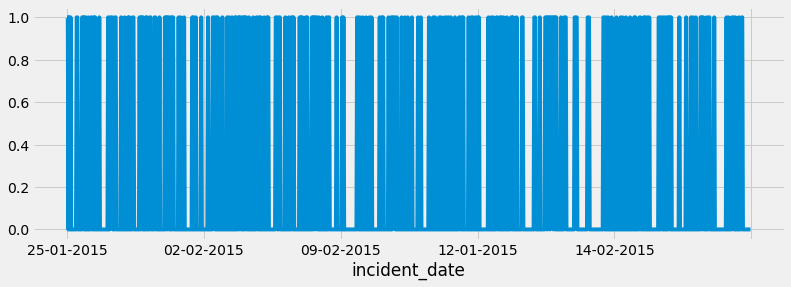

In [31]:
insurance1['fraud_reported_nom'].plot(figsize=(12,4))

In [32]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(insurance1)
modified_data = pd.DataFrame(r_scaler.transform(insurance1), index=insurance1.index, columns=insurance1.columns)
modified_data.head()

,months_as_customer,age,policy_number,policy_state_nom,policy_csl_nom,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex_nom,...,witnesses,police_report_available_nom,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make_nom,auto_model_nom,auto_year,fraud_reported_nom
incident_date,,,,,,,,,,,,,,,,,,,,,
25-01-2015,0.684760,0.644444,0.468247,1.0,0.5,0.333333,0.603112,0.090909,0.188769,1.0,...,0.666667,1.0,0.622801,0.303497,0.550063,0.654296,0.769231,0.026316,0.45,1.0
21-01-2015,0.475992,0.511111,0.269370,0.5,0.5,1.000000,0.473214,0.545455,0.199478,1.0,...,0.000000,0.0,0.043285,0.036364,0.032953,0.043276,0.615385,0.315789,0.60,1.0
22-02-2015,0.279749,0.222222,0.653098,1.0,0.0,1.000000,0.606972,0.545455,0.002766,0.0,...,1.000000,0.0,0.300906,0.358974,0.162653,0.289722,0.307692,0.789474,0.60,0.0
10-01-2015,0.534447,0.488889,0.141334,0.0,0.5,1.000000,0.608582,0.636364,0.932699,0.0,...,0.666667,0.0,0.551298,0.295571,0.267850,0.637187,0.230769,0.894737,0.95,1.0
17-02-2015,0.475992,0.555556,0.296730,0.0,1.0,0.333333,0.712760,0.636364,0.946264,1.0,...,0.333333,0.0,0.055739,0.060606,0.027461,0.056359,0.000000,0.815789,0.70,0.0


In [33]:
insurance1 = insurance1.astype({"fraud_reported_nom":"int"})

In [42]:
insurance1

,months_as_customer,age,policy_number,policy_state_nom,policy_csl_nom,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex_nom,...,witnesses,police_report_available_nom,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make_nom,auto_model_nom,auto_year,fraud_reported_nom
incident_date,,,,,,,,,,,,,,,,,,,,,
25-01-2015,328,48,521585,2,1,1000,1406.91,0,466132,1,...,2,1,71610,6510,13020,52080,10,1,2004,1
21-01-2015,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,0,0,5070,780,780,3510,8,12,2007,1
22-02-2015,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,7700,3850,23100,4,30,2007,0
10-01-2015,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,6340,6340,50720,3,34,2014,1
17-02-2015,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22-02-2015,3,38,941851,2,2,1000,1310.80,0,431289,0,...,1,0,87200,17440,8720,61040,6,6,2006,0
24-01-2015,285,41,186934,0,0,1000,1436.79,0,608177,0,...,3,0,108480,18080,18080,72320,13,28,2015,0
23-01-2015,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,3,1,67500,7500,7500,52500,11,19,1996,0


#### Feature Selection

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = insurance1.drop('fraud_reported_nom', axis=1)
y = insurance1['fraud_reported_nom']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['months_as_customer', 'age', 'policy_number', 'policy_annual_premium', 'insured_zip', 'insured_occupation_nom', 'insured_hobbies_nom', 'incident_severity_ord', 'incident_location_nom', 'incident_hour_of_the_day', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_model_nom', 'auto_year']
[0.0370098  0.03155822 0.03945667 0.01167272 0.00901165 0.00942452
 0.04201903 0.01512986 0.04693011 0.00616683 0.01974339 0.03101893
 0.06499909 0.01645682 0.02428649 0.02122515 0.00661775 0.01193218
 0.1331415  0.01351366 0.01879952 0.01898039 0.04290595 0.028169
 0.01007307 0.00509093 0.00951925 0.01377173 0.00498871 0.04021694
 0.04082733 0.0456361  0.04006602 0.02522568 0.02915328 0.03526176]


#### Selected features

In [37]:
features = insurance1[['months_as_customer', 'age', 'policy_number', 'policy_annual_premium', 'insured_zip', 'insured_occupation_nom', 'insured_hobbies_nom', 'incident_severity_ord', 'incident_location_nom', 'incident_hour_of_the_day', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_model_nom', 'auto_year']]
target = insurance1['fraud_reported_nom']

*******************************************************************************************************************************

In [38]:

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [40]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

#### Logistic Regression

Accuracy = 0.776
ROC Area under Curve = 0.5016061980347695
Cohen's Kappa = 0.0048336650554451355
Time taken = 0.03329753875732422
              precision    recall  f1-score   support

           0    0.78455   0.98469   0.87330       196
           1    0.25000   0.01852   0.03448        54

    accuracy                        0.77600       250
   macro avg    0.51728   0.50161   0.45389       250
weighted avg    0.66909   0.77600   0.69212       250



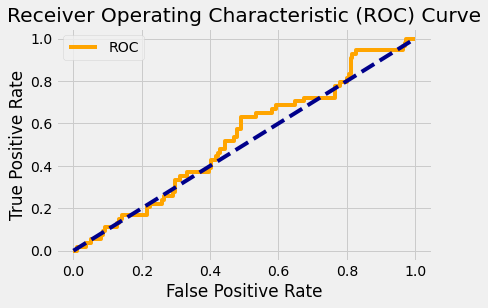

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


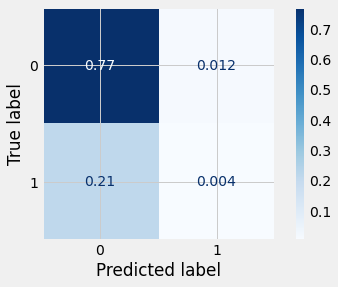

In [41]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

#### Decision Tree

Accuracy = 0.668
ROC Area under Curve = 0.6004346182917613
Cohen's Kappa = 0.17006639468842488
Time taken = 0.010002613067626953
              precision    recall  f1-score   support

           0    0.83432   0.71939   0.77260       196
           1    0.32099   0.48148   0.38519        54

    accuracy                        0.66800       250
   macro avg    0.57765   0.60043   0.57889       250
weighted avg    0.72344   0.66800   0.68892       250



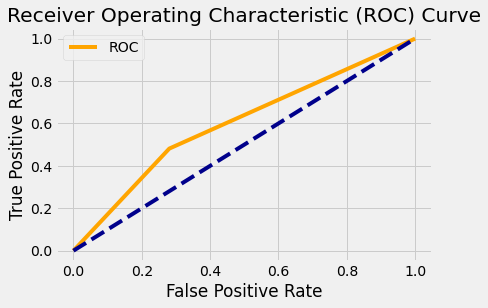

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


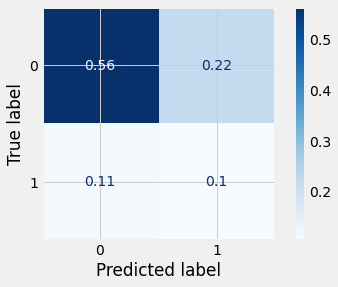

In [43]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

#### Random Forest

Accuracy = 0.784
ROC Area under Curve = 0.6006235827664399
Cohen's Kappa = 0.2398648648648649
Time taken = 0.3324394226074219
              precision    recall  f1-score   support

           0    0.82273   0.92347   0.87019       196
           1    0.50000   0.27778   0.35714        54

    accuracy                        0.78400       250
   macro avg    0.66136   0.60062   0.61367       250
weighted avg    0.75302   0.78400   0.75937       250



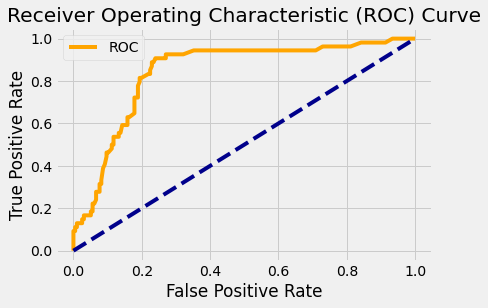

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


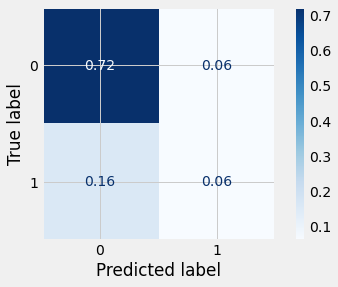

In [44]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

#### XGBoost

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:48:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.828
ROC Area under Curve = 0.7628495842781556
Cohen's Kappa = 0.5086388152481945
Time taken = 0.37513232231140137
              precision    recall  f1-score   support

           0    0.90052   0.87755   0.88889       196
           1    0.59322   0.64815   0.61947        54

    accuracy                        0.82800       250
   macro avg    0.74687   0.76285   0.75418       250
weighted avg    0.83415   0.82800   0.83069       250



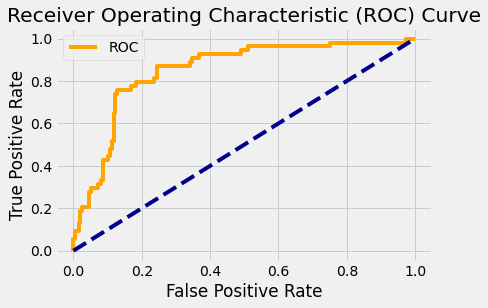

C:\Users\Usuario\anaconda3\envs\spyder1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


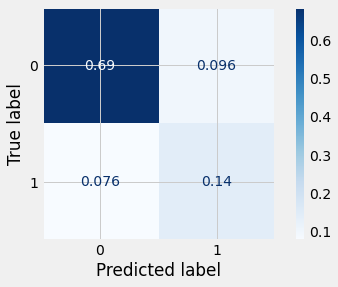

In [45]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

#### Model Comparison

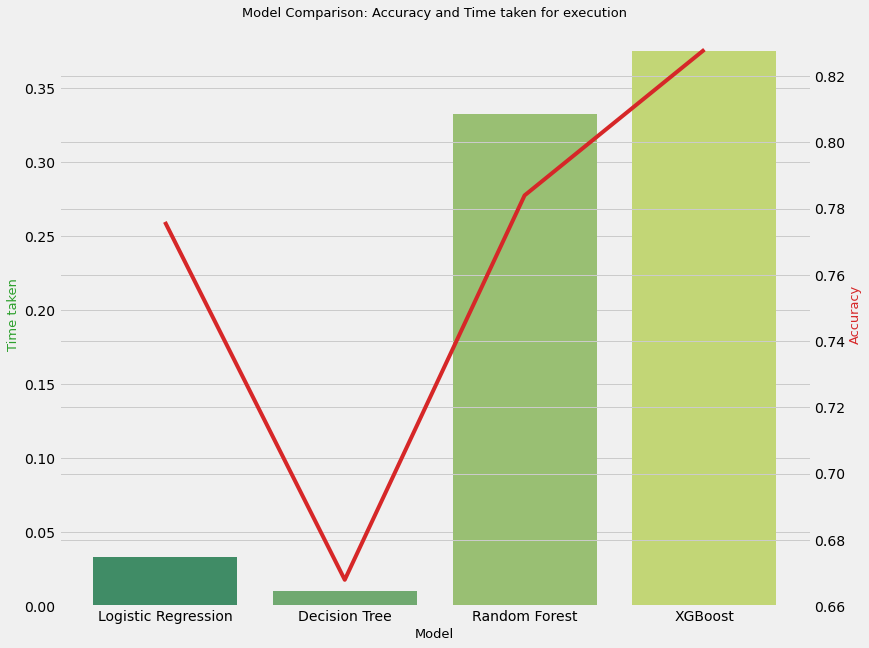

In [46]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)